# Lesson 9 Practical Application

## Swathi Samuel

### Documentation: none

1. The tips.csv dataset contains data on tips collected from a restaurant


    a. Find the mean tip broken down by sex. On one plot, build a histogram of tips for males overlaid with a histogram of tips for females. Disscuss what was found.

In [2]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

In [3]:
tips= Table.read_table('tips.csv')
tips.select('tip','sex').groups('sex',np.mean)

sex,tip mean
Female,2.83345
Male,3.08962


C:\Users\C20Swathi.Samuel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


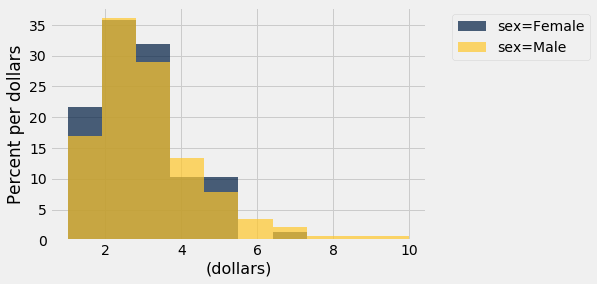

In [4]:
tips.hist("tip", unit="dollars", group="sex")

    b. Repeat part a, but broken down by time. 

C:\Users\C20Swathi.Samuel\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


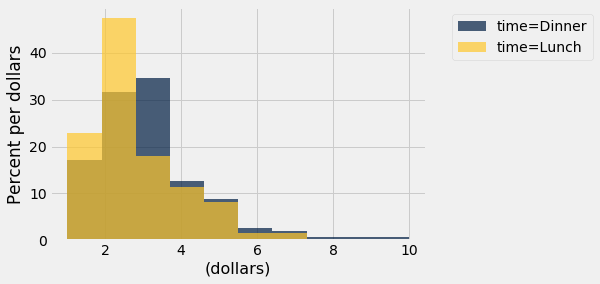

In [5]:
tips.hist("tip", unit="dollars", group="time")

2)	Create a function called weekday_to_num. This function inputs a string denoting day of the week (Mon, Tues, Wed, Thur, Fri, Sat, Sun), and returns a number (Mon = 1, Tues = 2, … Sun = 7). 

In [6]:
def weekday_to_num(st):
    days=["Mon","Tues", "Wed", "Thur", "Fri", "Sat", "Sun"]
    return days.index(st)+1

In [7]:
weekday_to_num("Tues")

2

In [8]:
weekday_to_num("Wed")

3

In [9]:
weekday_to_num("Sun")

7

3)	Apply this function to the day column of tips and include the result as a new column in tips, called weekday_num. 

In [10]:
tips.with_column('weekday_num', tips.apply(weekday_to_num,'day'))

total_bill,tip,sex,smoker,day,time,size,weekday_num
16.99,1.01,Female,No,Sun,Dinner,2,7
10.34,1.66,Male,No,Sun,Dinner,3,7
21.01,3.5,Male,No,Sun,Dinner,3,7
23.68,3.31,Male,No,Sun,Dinner,2,7
24.59,3.61,Female,No,Sun,Dinner,4,7
25.29,4.71,Male,No,Sun,Dinner,4,7
8.77,2,Male,No,Sun,Dinner,2,7
26.88,3.12,Male,No,Sun,Dinner,4,7
15.04,1.96,Male,No,Sun,Dinner,2,7
14.78,3.23,Male,No,Sun,Dinner,2,7


4)	Create a function called est_tip. The goal of this function is to predict tip amount based on the value of the bill (total_bill). To do this, we will look at “nearby” values (i.e. tip, where the value of total_bill is near the value of interest.) For example, if we want to predict the tip for total bill value of '$20$, we will simply look at all total bills near $20$ and average the tip amount. The input of est_tip should be the total bill amount and the window, or the difference in total bill we would consider “nearby”. For example, for a window of $1$, we will look at all bills totaling $19$ thru $21$. The output of this function will be the predicted tip amount. 

In [11]:
def est_tip(bill,window):
    rng= tips.where("total_bill",are.between(bill-window,bill+window))
    tip_rng=rng.column("tip")
    return np.mean(tip_rng)

5)	Apply this function to the total_bill column of tips and include the result as a new column in tips. Build a scatterplot showing predicted tip amount overlaid with actual tip amount. 

In [18]:
tips=tips.with_column('estimated_tip', tips.apply(lambda x: est_tip(x,10),'total_bill'))

In [19]:
new_tips=tips.select("total_bill","tip",'estimated_tip')
new_tips

total_bill,tip,estimated_tip
16.99,1.01,2.69279
10.34,1.66,2.39717
21.01,3.5,2.92876
23.68,3.31,3.17346
24.59,3.61,3.24286
25.29,4.71,3.3137
8.77,2,2.35281
26.88,3.12,3.48058
15.04,1.96,2.62133
14.78,3.23,2.61529


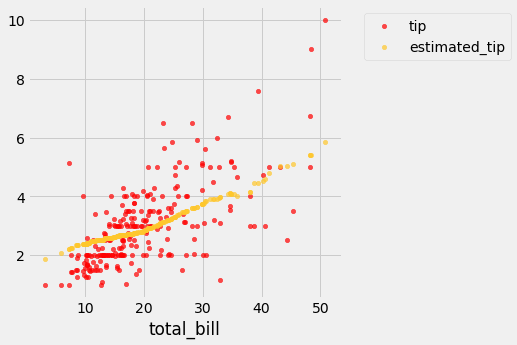

In [20]:
new_tips.scatter("total_bill",color='red')